In [23]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.simplefilter(action='ignore')

In [28]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

with open('../../output/cv_df_list_prospective.pkl', 'rb') as file:
    data_file = pickle.load(file)

data = data_file[6]
    
data = data.loc[data['province'] == 10]
data.tail()

,province,year,biweek,date_sick,cases
177,10,2012,22,2012-10-22,658
178,10,2012,23,2012-11-05,650
179,10,2012,24,2012-11-19,638
180,10,2012,25,2012-12-03,589
181,10,2012,26,2012-12-17,390


In [30]:
date_sick = np.array(data['date_sick'])
year = np.array(data['year'])
biweek = np.array(data['biweek'])
biweek_float = year + biweek/26

cases = np.array(data['cases'])

cum_sum = cases.cumsum()
spline = UnivariateSpline(x=biweek_float, y=cum_sum)
smooth_sum = spline(biweek_float)

smooth_cases = np.diff(smooth_sum)
x = np.append(smooth_cases[::-1], cum_sum[0])
smooth_cases = x[::-1]

In [31]:
df = pd.DataFrame(list(zip(date_sick, cases)), columns=['ds', 'y'])

# fit the prophet model
model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df)

# extend the dataframe and get the predictions
future_dates = model.make_future_dataframe(periods=12, freq='M')
past_and_forecast = model.predict(future_dates)
forecast = past_and_forecast.tail(12)

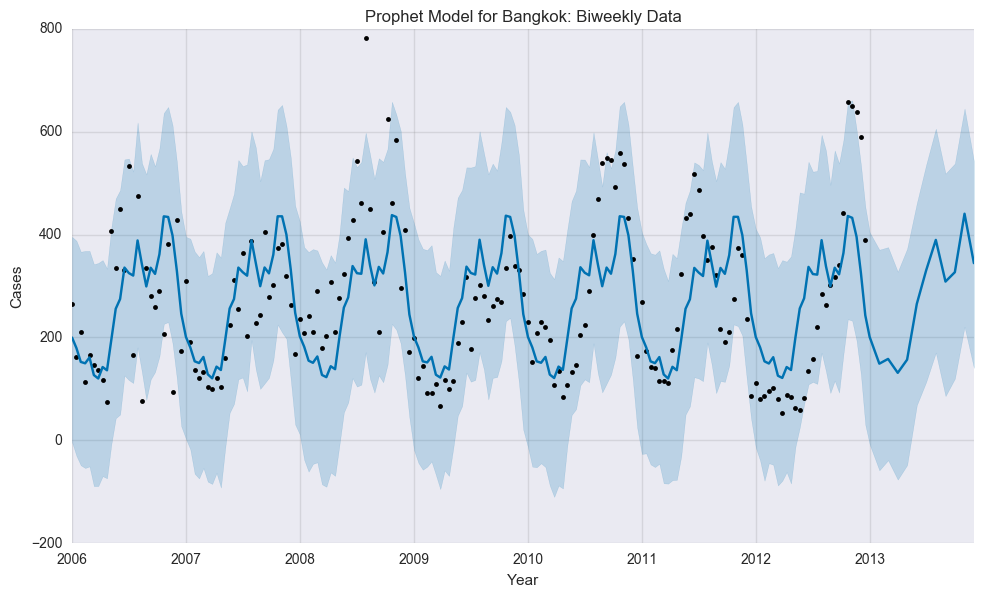

In [32]:
plot = model.plot(past_and_forecast)
plt.title('Prophet Model for Bangkok: Biweekly Data')
plt.xlabel('Year')
plt.ylabel('Cases')

plt.show()